### Import bibliotek

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
from networkx.algorithms.community.centrality import girvan_newman

### Import danych

In [35]:
#Zainportuj dane "eurovision_2019.xlsx".
df = pd.read_excel('eurovision_2019.xlsx', index_col=0)
df.head()

,countryfrom,countryto,weight
0,Albania,Australia,2
1,Albania,Azerbaijan,11
2,Albania,Cyprus,7
3,Albania,France,3
4,Albania,Greece,6


### Wizualizacja grafu

In [36]:
#Utwórz graf z danych za pomocą funkcji "nx.from_pandas_edgelist", uwzględnij dodatkowy argument ['weight'] oraz create_using=nx.OrderedDiGraph
G = nx.from_pandas_edgelist(df, source="countryfrom", target="countryto", edge_attr="weight", create_using=nx.DiGraph())

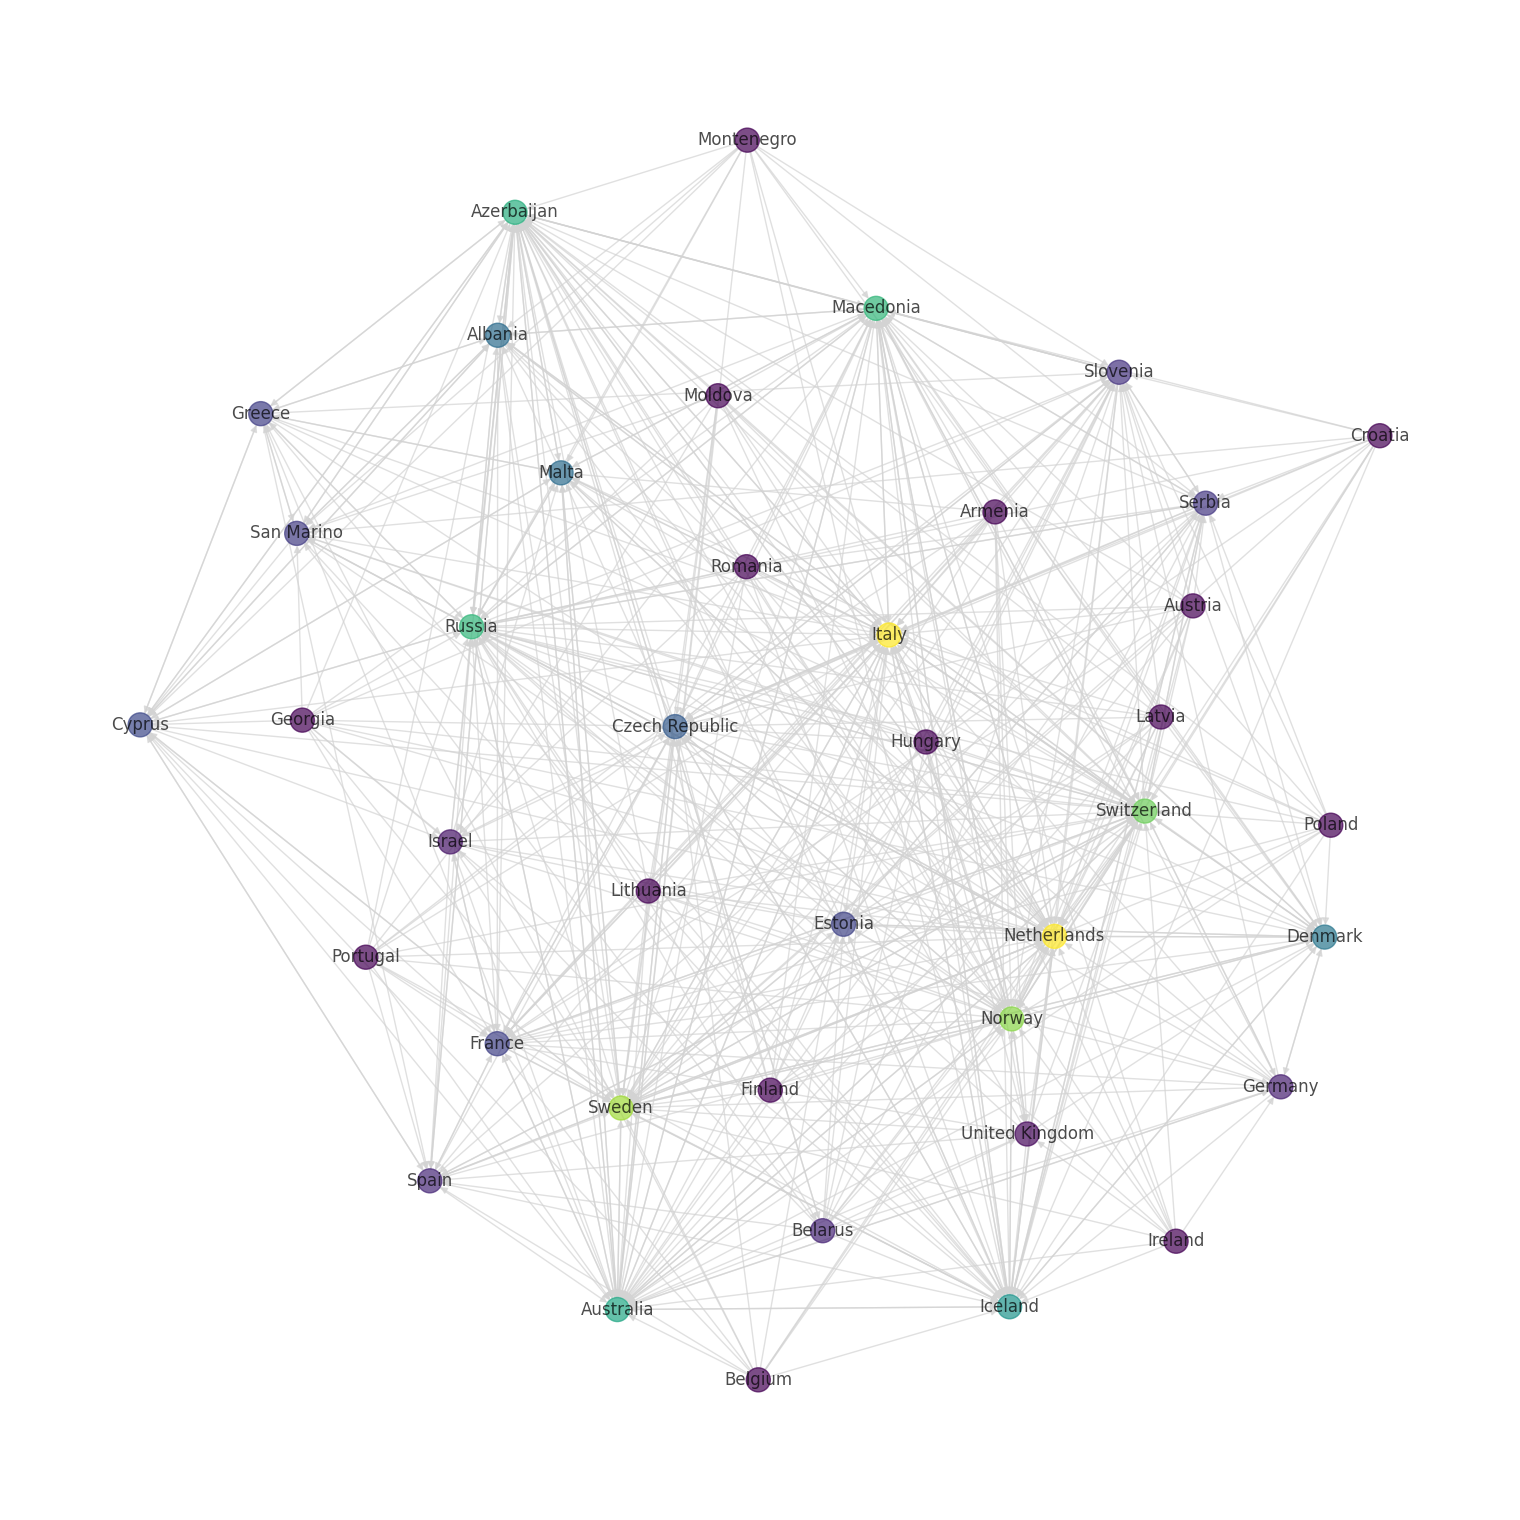

In [40]:
#Zwizualizuj graf za pomocą funkcji "nx.draw", dodaj argument node_color==list(nx.pagerank(G).values())  pozwoli to na uwzględnienie miary pagerank - miary wskazującej na ważność aktora na podstawie relacji skierowanych w jego stronę od innych aktorów.
plt.figure(figsize=(15,15))
nx.draw(G, node_color=list(nx.pagerank(G).values()), with_labels=True, edge_color='lightgray', alpha=0.7)

### Podstawowe informacje

In [41]:
#Sprawdź podstawowe informacje o grafie poprzez formuły nx.info(G), G.nodes(), G.edges()
G.nodes()

NodeView(('Albania', 'Australia', 'Azerbaijan', 'Cyprus', 'France', 'Greece', 'Italy', 'Macedonia', 'Netherlands', 'Norway', 'Russia', 'San Marino', 'Sweden', 'Switzerland', 'Armenia', 'Czech Republic', 'Iceland', 'Malta', 'United Kingdom', 'Germany', 'Austria', 'Serbia', 'Slovenia', 'Belarus', 'Spain', 'Estonia', 'Israel', 'Belgium', 'Croatia', 'Denmark', 'Finland', 'Georgia', 'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Moldova', 'Montenegro', 'Poland', 'Portugal', 'Romania'))

In [42]:
G.edges()

OutEdgeView([('Albania', 'Australia'), ('Albania', 'Azerbaijan'), ('Albania', 'Cyprus'), ('Albania', 'France'), ('Albania', 'Greece'), ('Albania', 'Italy'), ('Albania', 'Macedonia'), ('Albania', 'Netherlands'), ('Albania', 'Norway'), ('Albania', 'Russia'), ('Albania', 'San Marino'), ('Albania', 'Sweden'), ('Albania', 'Switzerland'), ('Australia', 'Azerbaijan'), ('Australia', 'Czech Republic'), ('Australia', 'France'), ('Australia', 'Germany'), ('Australia', 'Iceland'), ('Australia', 'Italy'), ('Australia', 'Macedonia'), ('Australia', 'Malta'), ('Australia', 'Netherlands'), ('Australia', 'Norway'), ('Australia', 'Russia'), ('Australia', 'Sweden'), ('Australia', 'Switzerland'), ('Azerbaijan', 'Albania'), ('Azerbaijan', 'Australia'), ('Azerbaijan', 'Belarus'), ('Azerbaijan', 'Cyprus'), ('Azerbaijan', 'Greece'), ('Azerbaijan', 'Italy'), ('Azerbaijan', 'Macedonia'), ('Azerbaijan', 'Malta'), ('Azerbaijan', 'Netherlands'), ('Azerbaijan', 'Russia'), ('Azerbaijan', 'San Marino'), ('Azerbaijan',

In [43]:
#Sprawdź gęstość grafu za pomocą funkcji nx.density()
nx.density(G)

0.32682926829268294

In [44]:
#Sprawdź przechodniość w grafie za pomocę funkcji nx.transitivity()
nx.transitivity(G)

0.7097269100951212

In [45]:
#Wskaż najkrótszą ścieżkę między Polską, a Albanią poprzez funkcję nx.shortest_path()
nx.shortest_path(G,"Poland", "Albania")

['Poland', 'Azerbaijan', 'Albania']

### Ważność aktora w sieci

In [46]:
#Sprawdzenie ważności aktorów w sieci za pomocą stopnia wierzchołka
G.degree()
sorted(nx.degree_centrality(G).items(), key=itemgetter(1), reverse=True)

[('Netherlands', 1.3),
 ('Italy', 1.2750000000000001),
 ('Russia', 1.25),
 ('Switzerland', 1.25),
 ('Azerbaijan', 1.225),
 ('Australia', 1.2000000000000002),
 ('Norway', 1.175),
 ('Iceland', 1.125),
 ('Macedonia', 1.1),
 ('Sweden', 1.1),
 ('Czech Republic', 0.9),
 ('France', 0.8250000000000001),
 ('Slovenia', 0.8),
 ('Denmark', 0.7250000000000001),
 ('Malta', 0.675),
 ('Serbia', 0.675),
 ('Albania', 0.6000000000000001),
 ('Cyprus', 0.6000000000000001),
 ('Spain', 0.6000000000000001),
 ('Estonia', 0.6000000000000001),
 ('San Marino', 0.525),
 ('Greece', 0.5),
 ('Germany', 0.47500000000000003),
 ('Israel', 0.47500000000000003),
 ('Belarus', 0.45),
 ('United Kingdom', 0.42500000000000004),
 ('Hungary', 0.375),
 ('Austria', 0.35000000000000003),
 ('Georgia', 0.35000000000000003),
 ('Poland', 0.35000000000000003),
 ('Portugal', 0.35000000000000003),
 ('Croatia', 0.325),
 ('Finland', 0.325),
 ('Latvia', 0.325),
 ('Lithuania', 0.325),
 ('Moldova', 0.325),
 ('Montenegro', 0.325),
 ('Romania', 

In [48]:
#Centralność bliskości - wartość 1 oznacza, że węzeł znajduje się w najbliższej odległości do wszystkich węzłów, 0 - oznacza, że jest w dalekiej pozycji od wzystkich węzłów w sieci.
#Im wartość bliższa jedności tym węzeł ma mozliwość wymiany informacji w krótszym czasie i polegając na mniejszej liczbie pośredników
#Sprawdź centralność bliskości za pomocą funkcji nx.closeness_centrality(graf)
sorted(nx.closeness_centrality(G).items(), key=itemgetter(1), reverse=True)


[('Netherlands', 0.975609756097561),
 ('Switzerland', 0.9523809523809523),
 ('Italy', 0.9090909090909091),
 ('Australia', 0.8888888888888888),
 ('Azerbaijan', 0.8888888888888888),
 ('Norway', 0.8888888888888888),
 ('Russia', 0.8888888888888888),
 ('Iceland', 0.851063829787234),
 ('Macedonia', 0.8163265306122449),
 ('Sweden', 0.8163265306122449),
 ('Czech Republic', 0.6896551724137931),
 ('France', 0.6557377049180327),
 ('Slovenia', 0.6557377049180327),
 ('Denmark', 0.6349206349206349),
 ('Malta', 0.6153846153846154),
 ('Serbia', 0.5882352941176471),
 ('Spain', 0.5882352941176471),
 ('Albania', 0.5797101449275363),
 ('Cyprus', 0.5797101449275363),
 ('San Marino', 0.5797101449275363),
 ('Estonia', 0.5797101449275363),
 ('Greece', 0.547945205479452),
 ('Germany', 0.5405405405405406),
 ('Israel', 0.5263157894736842),
 ('Belarus', 0.5128205128205128),
 ('United Kingdom', 0.5063291139240507),
 ('Armenia', 0.0),
 ('Austria', 0.0),
 ('Belgium', 0.0),
 ('Croatia', 0.0),
 ('Finland', 0.0),
 ('Ge

In [49]:
#Centralność pośredniczenia - wartość 1 oznacza, że węzeł znajduje się na wszystkich najkrótszych ścieżkach, wartoć 0 - węzeł nigdy nie występuje na najkrótszyh ścieżkach
#Sprawdź centralność pośredniczenia za pomocą funkcji nx.betweenness_centrality(graf)
sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1), reverse=True)

[('Azerbaijan', 0.04448194546119648),
 ('Russia', 0.04439718335720359),
 ('Norway', 0.030296937421178317),
 ('Switzerland', 0.026384825672528103),
 ('Italy', 0.019319894193375976),
 ('Macedonia', 0.016915904608212302),
 ('Australia', 0.016520201009067405),
 ('Czech Republic', 0.014354484921286537),
 ('Netherlands', 0.014130351158438203),
 ('Sweden', 0.013695726460149538),
 ('Iceland', 0.012220307854164131),
 ('France', 0.011741417554929696),
 ('Cyprus', 0.009210453148965294),
 ('Slovenia', 0.00617222277647379),
 ('Denmark', 0.006135395943088251),
 ('Malta', 0.005944575929393742),
 ('Serbia', 0.005568401178218991),
 ('Albania', 0.004751693519406071),
 ('Belarus', 0.004433084066181233),
 ('Estonia', 0.004167652148421379),
 ('San Marino', 0.003840060074877888),
 ('Spain', 0.0035503367714906178),
 ('Greece', 0.003461307211307211),
 ('Israel', 0.00257694228848075),
 ('Germany', 0.0022165058943905097),
 ('United Kingdom', 0.0017173175827021978),
 ('Armenia', 0.0),
 ('Austria', 0.0),
 ('Belgi

### Sieć ego dla Polski

In [51]:
#Wczytanie i pogrupowanie danych z wszystkich lat
data = pd.read_excel("eurovision_all.xlsx", index_col=0)
data = data.groupby(['countryfrom','countryto']).agg({'points':'sum'})\
    .reset_index().rename(columns={'points':'weight'})

In [64]:
#Wyodrębnj dane dla Polski (countryfrom ="Poland" oraz countryto=='Poland').
data_Poland = data[((data['countryfrom']=="Poland")|(data['countryto']=="Poland"))]
#Ogranicz dane do krajów między którymi przez badany okres wpłynęło conajmniej 30 punktów
data_Poland30 = data_Poland[data_Poland['weight']>30]

In [65]:
#Swórz graf dla wyodrębnionych danych
G_POLAND = nx.from_pandas_edgelist(data_Poland30, source="countryfrom", target="countryto", edge_attr="weight", create_using=nx.DiGraph())

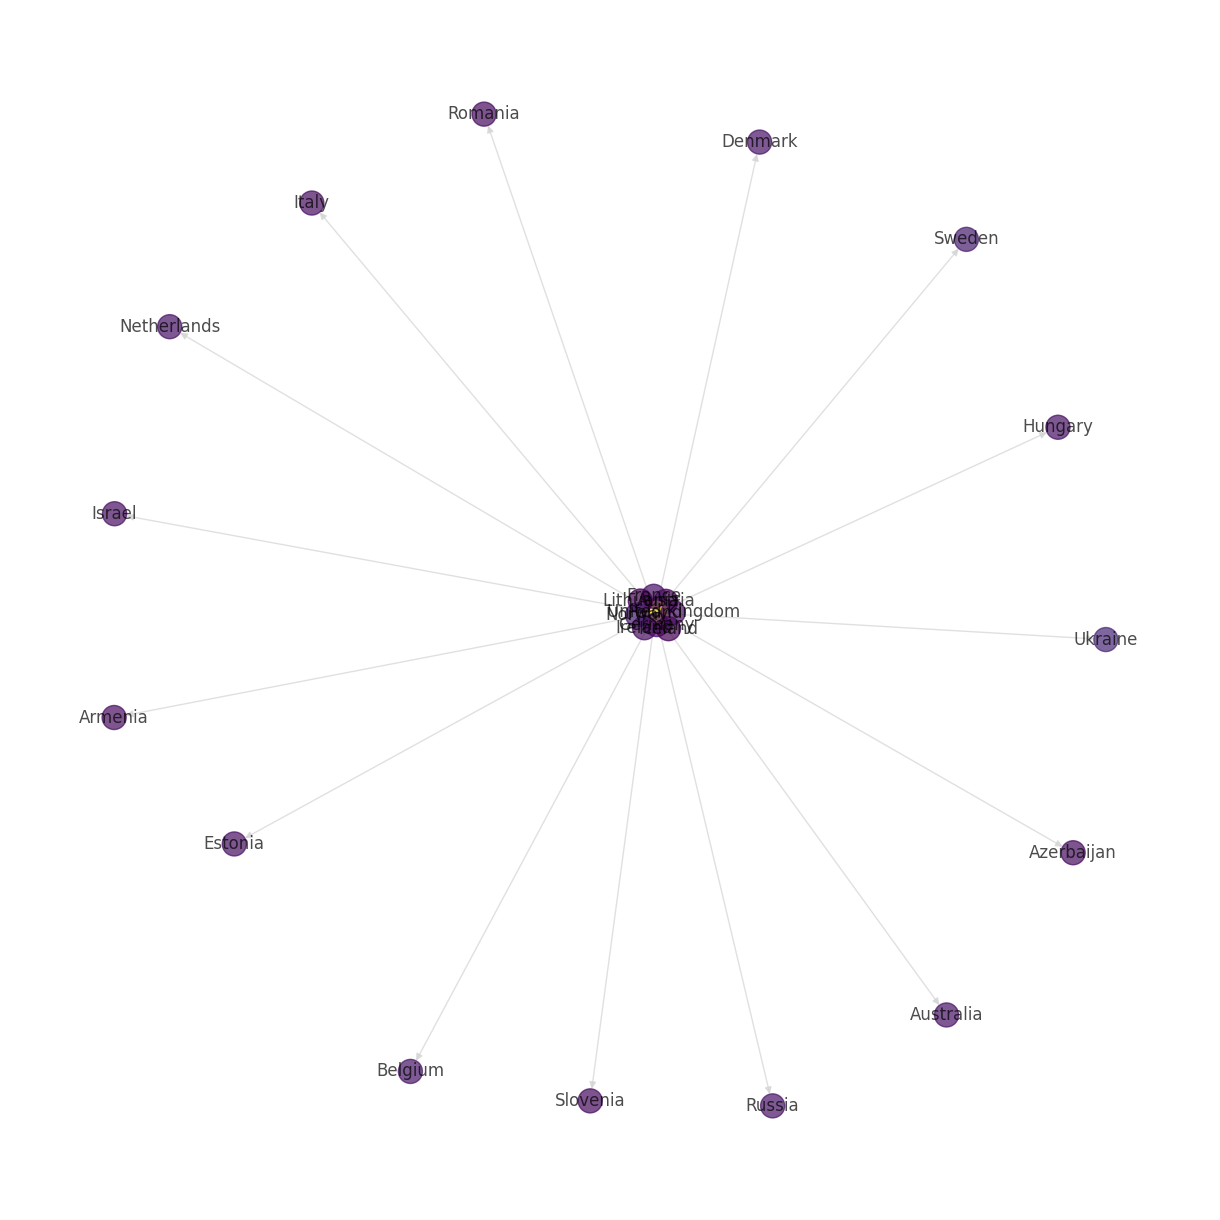

In [67]:
plt.figure(figsize=(12,12))
nx.draw(G_POLAND, node_color=list(nx.pagerank(G_POLAND).values()), with_labels=True, edge_color='lightgray', alpha=0.7)

### Wykrywanie wspólnot

[['Czech Republic', 'Latvia', 'Malta', 'Italy', 'Switzerland', 'Armenia', 'Lithuania', 'Ireland', 'Slovenia', 'Finland', 'Moldova', 'Iceland', 'Georgia', 'Estonia', 'Macedonia', 'Israel', 'Netherlands', 'Greece', 'Croatia', 'Denmark', 'Albania', 'France', 'Romania', 'Australia', 'Portugal', 'Serbia', 'Germany', 'Belarus', 'Spain', 'Hungary', 'Norway', 'Sweden', 'Austria', 'United Kingdom', 'Russia', 'Poland', 'San Marino', 'Cyprus', 'Azerbaijan'], ['Belgium'], ['Montenegro']]


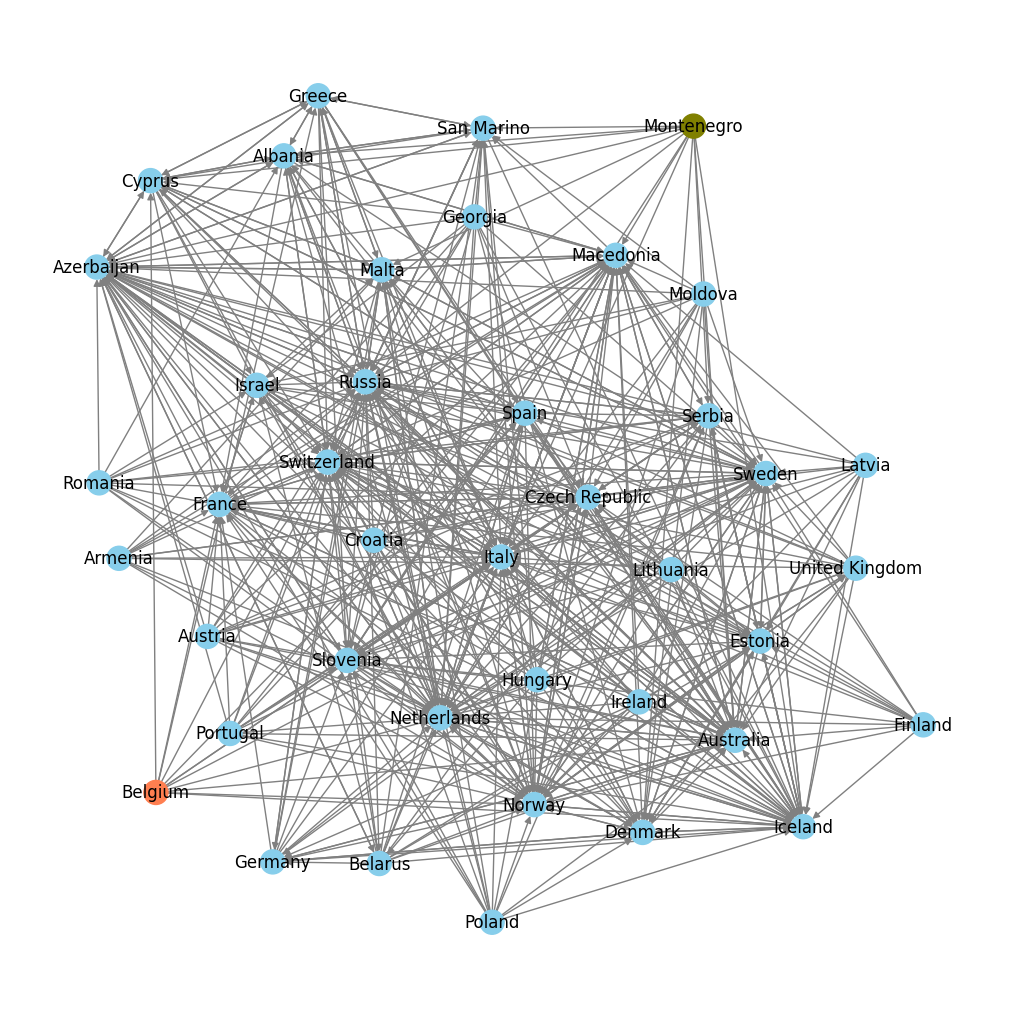

In [70]:
#Wspólnoty wyodręniane za pomocą metody Girvana-Newmana #https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
#g = nx.from_pandas_edgelist(df,'countryfrom','countryto',['weight'])
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('skyblue')
    elif node in node_groups[1]:
        color_map.append('coral')
    else:
        color_map.append('olive')
plt.figure(figsize=(10,10))
nx.draw_spring(G, node_color=color_map, with_labels=True, edge_color='gray')
plt.show()

### Wyrywanie wspólnot na przykładzie Gry o tron

In [71]:
#Wgranie danych "book1.csv" dotyczących relacji postaci z gry o tron
got = pd.read_csv("book1.csv")
got=(got[got.weight>20])
G = nx.from_pandas_edgelist(got, source='Source', target ='Target', edge_attr=True)

In [72]:
#Wyodrębnienie komponentów z sieci poprzez funkcję nx.connected_components (Komponent - sieć, która w obrębie grupy nie zawiera węzłów bez połączeń.)
components = nx.connected_components(G)
#Znalezienie największego komponentu poprzez funkcję max(komponent, key = len)
largest_component = max(components, key=len)

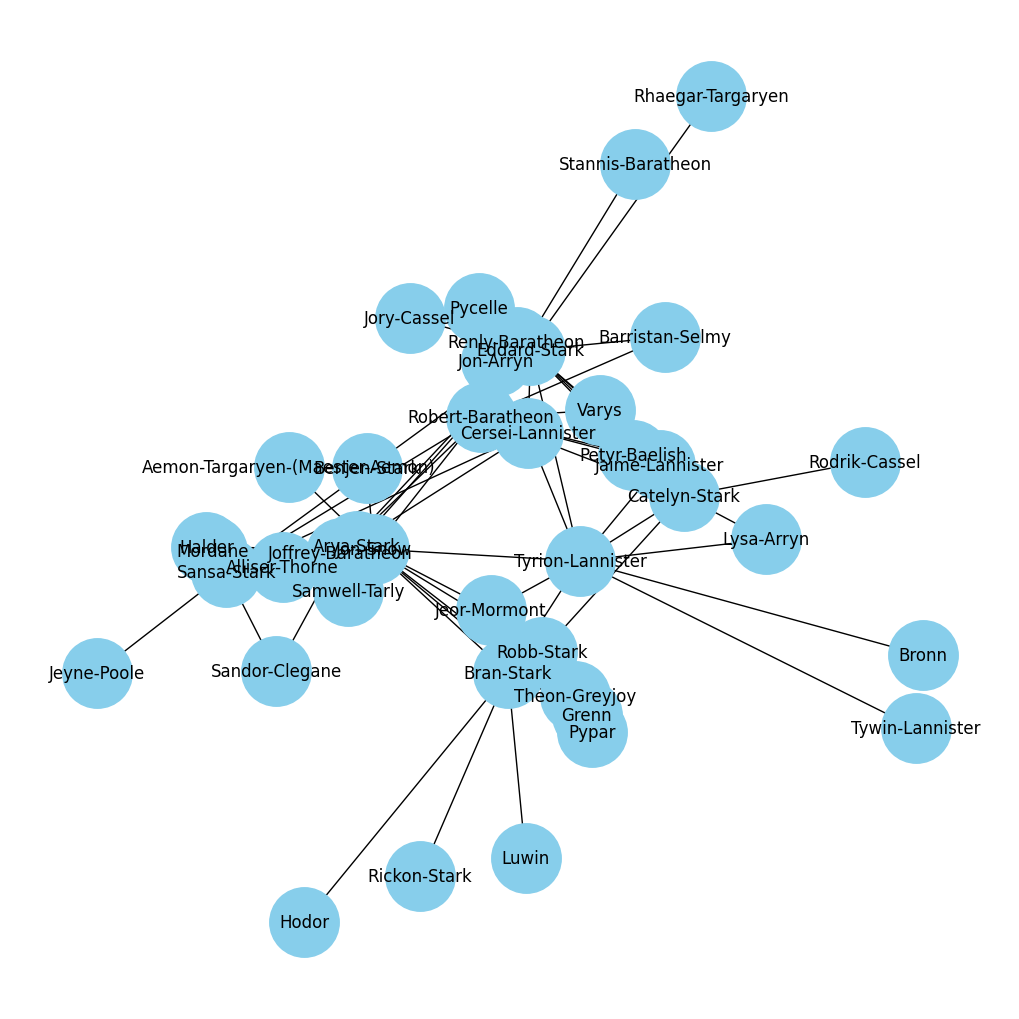

In [73]:
#Stworzenie grafu z największym komponentem sprawdzenie jego gęstości za pomocą funkcji nx.density().
nodes_to_remove = []
for x in G.nodes:
    if x not in largest_component:
        nodes_to_remove.append(x)
G.remove_nodes_from(nodes_to_remove)

plt.figure(figsize=(10,10))
d = dict(G.degree)
# pos = nx.shell_layout(G)
pos = nx.spring_layout(G, threshold=0.01, scale=0.5)

nx.draw(G, pos, nodelist=d.keys(), node_size=2500, with_labels=True, node_color='skyblue')
plt.show()

density = nx.density(G)